In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



[*********************100%***********************]  1 of 1 completed


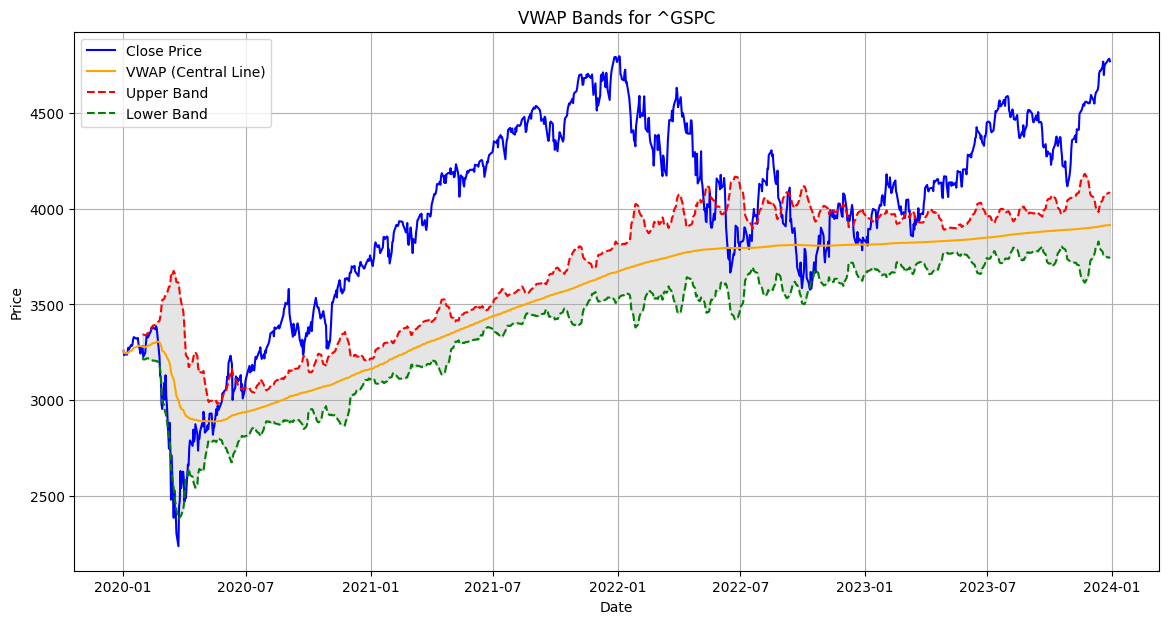

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate VWAP Bands
def vwap_bands(data, multiplier=2):
    # Calculate cumulative sum of price*volume and volume
    data['Cum Price*Vol'] = (data['Close'] * data['Volume']).cumsum()
    data['Cum Volume'] = data['Volume'].cumsum()
    
    # Calculate VWAP
    data['VWAP'] = data['Cum Price*Vol'] / data['Cum Volume']
    
    # Calculate rolling standard deviation of the Close price
    data['Std Dev'] = data['Close'].rolling(window=20).std()
    
    # Calculate Upper and Lower Bands
    data['Upper Band'] = data['VWAP'] + (multiplier * data['Std Dev'])
    data['Lower Band'] = data['VWAP'] - (multiplier * data['Std Dev'])
    
    return data

# Apply the function
data = vwap_bands(data)

# Step 3: Plot VWAP Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['VWAP'], label='VWAP (Central Line)', color='orange', linestyle='-')
plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
plt.title(f'VWAP Bands for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [4]:
def show_vwap(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the function
    data = vwap_bands(data)
    
    # Step 3: Plot VWAP Bands
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['VWAP'], label='VWAP (Central Line)', color='orange', linestyle='-')
    plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
    plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
    plt.title(f'VWAP Bands for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


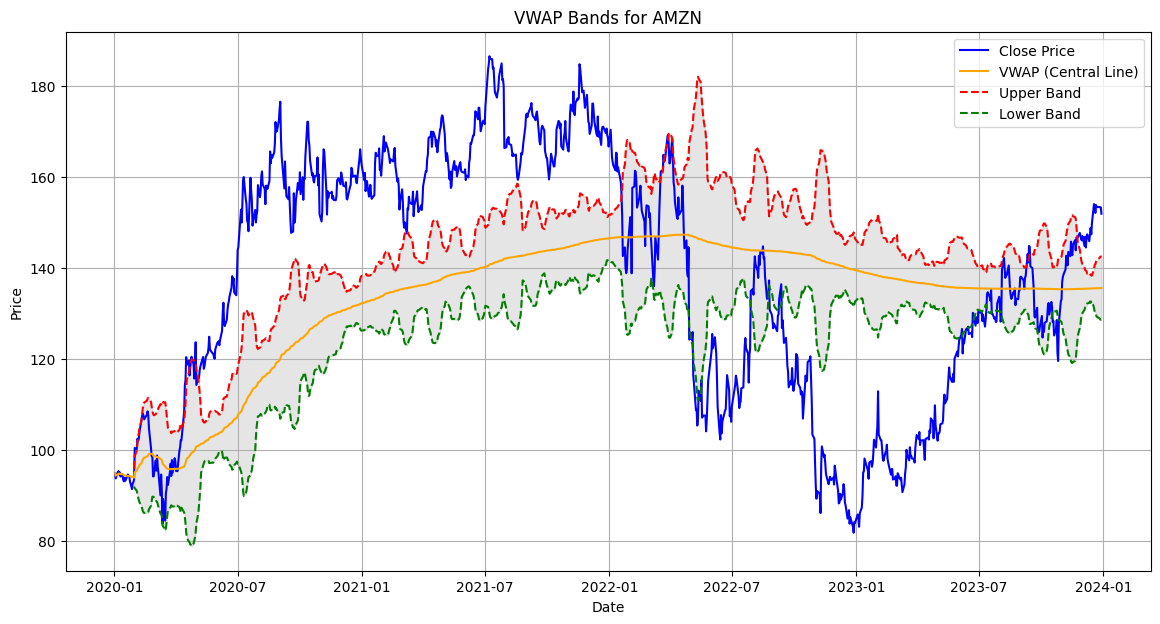

In [5]:
show_vwap("AMZN")